In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import exp
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import sys
sys.path.append('..')
%matplotlib inline

# Foreward Propagation

## The neuron

![alt text](/assets/perceptron.png)

defined as:

$n_f(x) = f(a^T\cdot x+b)$

where

$f$ is the activation function

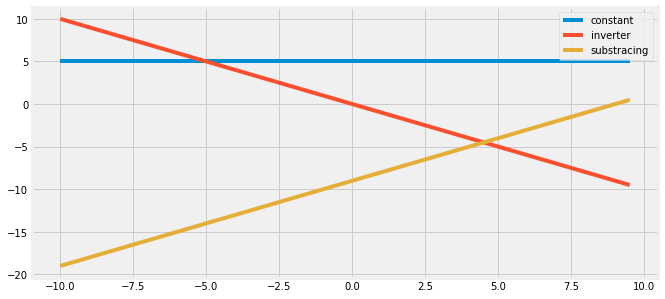

In [2]:
# the activation function is id
def constant_neuron(x):
    return 0*x+5

def inverter_neuron(x):
    return (-1)*x+0

def substracting_neuron(x):
    return 1*x-9

data = np.arange(-10, 10, 0.5)
res_1 = constant_neuron(data)
res_2 = inverter_neuron(data)
res_3 = substracting_neuron(data)

plt.figure(figsize=(10,5))
fig = plt.plot(data, res_1, label="constant")
fig = plt.plot(data, res_2, label="inverter")
fig = plt.plot(data, res_3, label="substracing")
plt.legend()
plt.show()

 ### the sigmoid activation function
 defined as:
 
#### $f: \mathbb{R}\rightarrow(0,1)\\f(x)=\frac{1}{1+e^{-x}}$
 
 with
 $lim_{x\to\infty} f(x) \rightarrow 1$
 and
 $lim_{x\to - \infty} f(x) \rightarrow 0$.

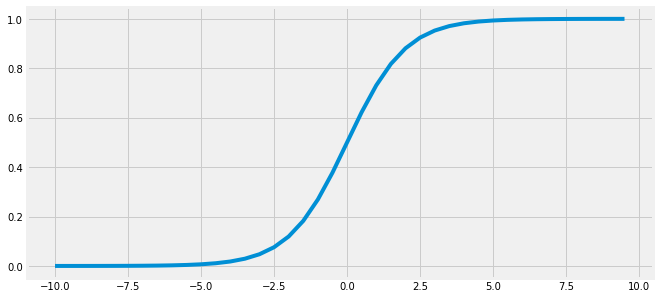

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
data = np.arange(-10, 10, 0.5)
result = sigmoid(data)

plt.figure(figsize=(10,5))
fig = plt.plot(data, result)
plt.show()

# Breast Cancer Wisconsin (Diagnostic) Dataset
 - 30 inputs
 - 1 output:
     $y > 0.5 \rightarrow malignant$ or
     $y < 0.5 \rightarrow malignant$

## 1. task: implement forward propagation for the BCW-Dataset

access weights + biases from `src.forward.ForewardWeightsBC`

the foreward-pass should be a function from $\mathbb{R}^{n \times 30} \rightarrow \mathbb{R}^n$, where $n$ is the number of samples, you can evaluate your solution by calling `ForewardWeightsBCW.eval` with the function passed as an argument

a matrix-multiplication is archieved via np.dot(A, B)

you can transpose a matrix via a.transpose()

In [4]:
from src.forward import *

In [5]:
#SOLUTION!!!
weightsB = ForewardWeightsBCW()
def forewardPass(data):
    return sigmoid(np.dot(data, weightsB.getWeights().transpose()) + weightsB.getBias())
weightsB.eval(forewardPass)

0.02907169551123526

# The MLP

![alt text](/assets/mlp_model.png)

## Softmax
 - "generalized sigmoid"
 - normalizes your output $o_i$, so that $\sum_i o_i = 1$
 
#### $s: \mathbb{R}^n\rightarrow[0,1]^n\\s(x)_j=\frac{e^{x_j}}{\sum_{n = 0}^l e^{x_n}}$

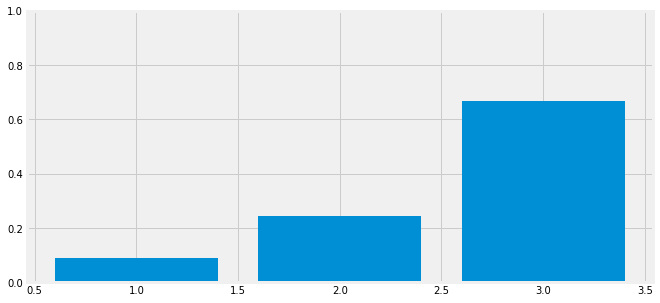

sum:  1.0


In [6]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))
    
data = np.arange(1, 4, 1)
result = softmax(data)

plt.figure(figsize=(10,5))
fig = plt.bar(data, result)
plt.ylim(0, 1)
plt.show()

print("sum: ", np.sum(result))

## 2. task: implement forward propagation for the MNIST-Dataset
 - 2 layers, a 200 neuron hidden-layer and 10 neuron output layer
 - activation function: sigmoid
 - Use `ForewardWeight` to access the weights and `Evaluation` to test the forward propagation
 - you have to return the class, not the probabilites!

In [7]:
from src.forward import *
weightsB = ForewardWeightsMNIST()

/Users/LeanderK/.virtualenvs/Basics/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [8]:
#SOLUTION

In [9]:
weightsB.getWeights(0).shape

(784, 50)

In [10]:
weightsB.getWeights(1).shape

(50, 10)

In [11]:
def forewardMNIST(data):
    hidden = sigmoid(np.dot(data, weightsB.getWeights(0)) + weightsB.getBias(0))
    out = softmax(np.dot(hidden, weightsB.getWeights(1)) + weightsB.getBias(1))
    return out

def getClass(data):
    proba = forewardMNIST(data)
    return np.argmax(proba, axis=1)
    
weightsB.eval(getClass)

mse real: 0.4936


0.4936

In [12]:
weightsB.getBias(0).shape

(50,)

visualize output:

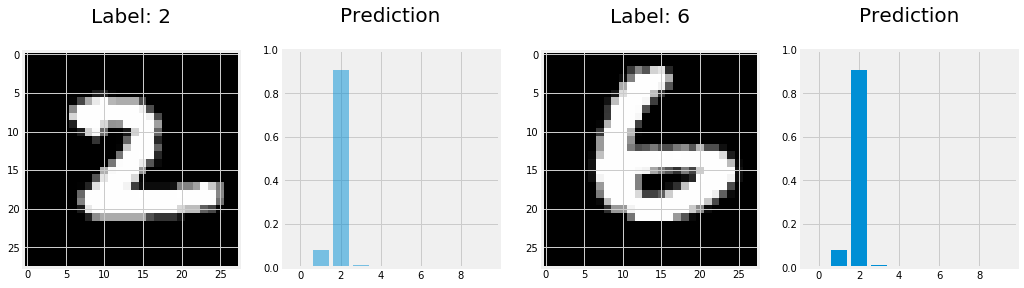

In [17]:
weightsB.visualize(forewardMNIST)